# 2.1.8 Preparing a dataset for modeling

## data information

|variable name|information|
|---|---|
|age:| continuous. |
|workclass:| Private, Self-emp-not-inc, Self-emp-inc, Federal-gov, Local-gov, State-gov, Without-pay, Never-worked.|
|fnlwgt:| continuous.|
|education:| Bachelors, Some-college, 11th, HS-grad, Prof-school, Assoc-acdm, Assoc-voc, 9th, 7th-8th, 12th, Masters, 1st-4th, 10th, Doctorate, 5th-6th, Preschool.|
|education-num:| continuous.|
|marital-status:| Married-civ-spouse, Divorced, Never-married, Separated, Widowed, Married-spouse-absent, Married-AF-spouse.|
|occupation:| Tech-support, Craft-repair, Other-service, Sales, Exec-managerial, Prof-specialty, Handlers-cleaners, Machine-op-inspct, Adm-clerical, Farming-fishing, Transport-moving, Priv-house-serv, Protective-serv, Armed-Forces.|
|relationship:| Wife, Own-child, Husband, Not-in-family, Other-relative, Unmarried.|
|race:| White, Asian-Pac-Islander, Amer-Indian-Eskimo, Other, Black.|
|sex:| Female, Male.|
|capital-gain:| continuous.|
|capital-loss:| continuous.|
|hours-per-week:| continuous.|
|native-country:| United-States, Cambodia, England, Puerto-Rico, Canada, Germany, Outlying-US(Guam-USVI-etc), India, Japan, Greece, South, China, Cuba, Iran, Honduras, Philippines, Italy, Poland, Jamaica, Vietnam, Mexico, Portugal, Ireland, France, Dominican-Republic, Laos, Ecuador, Taiwan, Haiti, Columbia, Hungary, Guatemala, Nicaragua, Scotland, Thailand, Yugoslavia, El-Salvador, Trinadad&Tobago, Peru, Hong, Holand-Netherlands.|
<br>
Extraction was done by Barry Becker from the 1994 Census database. A set of reasonably clean records was extracted using the following conditions: ((AAGE>16) && (AGI>100) && (AFNLWGT>1)&& (HRSWK>0)) <br>

Prediction task is to determine whether a person makes over 50K a year. <br>




** base variables **
1. sex - categorical <br>
2. race - categorical <br>
3. age - numerical <br>
4. education - numerical <br>
5. hours_per week - nemerical <br>

**outcome variable** <br>
income 

## Univariate exploration 

In [162]:
%matplotlib inline
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import scipy.stats as stats

df=pd.read_csv('adult.csv', names=['age','workclass','fnlwgt','education','education_num',
                                   'marital-status','occupation','relationship','race',
                                   'sex','capital_gain','capital-loss','hours-per-week',
                                   'native-country','income'])

df.head()

,age,workclass,fnlwgt,education,education_num,marital-status,occupation,relationship,race,sex,capital_gain,capital-loss,hours-per-week,native-country,income
0,39,State-gov,77516,Bachelors,13,Never-married,Adm-clerical,Not-in-family,White,Male,2174,0,40,United-States,<=50K
1,50,Self-emp-not-inc,83311,Bachelors,13,Married-civ-spouse,Exec-managerial,Husband,White,Male,0,0,13,United-States,<=50K
2,38,Private,215646,HS-grad,9,Divorced,Handlers-cleaners,Not-in-family,White,Male,0,0,40,United-States,<=50K
3,53,Private,234721,11th,7,Married-civ-spouse,Handlers-cleaners,Husband,Black,Male,0,0,40,United-States,<=50K
4,28,Private,338409,Bachelors,13,Married-civ-spouse,Prof-specialty,Wife,Black,Female,0,0,40,Cuba,<=50K


In [163]:
print('data point is', df.shape)

data point is (32561, 15)


In [164]:
#subset of data
df_pick=df.loc[:,['income','sex','race','age','education_num','hours-per-week']]
df_pick.head()

,income,sex,race,age,education_num,hours-per-week
0,<=50K,Male,White,39,13,40
1,<=50K,Male,White,50,13,13
2,<=50K,Male,White,38,9,40
3,<=50K,Male,Black,53,7,40
4,<=50K,Female,Black,28,13,40


In [165]:
df_pick.describe()

,age,education_num,hours-per-week
count,32561.000000,32561.000000,32561.000000
mean,38.581647,10.080679,40.437456
std,13.640433,2.572720,12.347429
min,17.000000,1.000000,1.000000
25%,28.000000,9.000000,40.000000
50%,37.000000,10.000000,40.000000
75%,48.000000,12.000000,45.000000
max,90.000000,16.000000,99.000000


In [166]:
# calculating missing values
print(df_pick.isnull().sum())
print('There is no missing value')

income            0
sex               0
race              0
age               0
education_num     0
hours-per-week    0
dtype: int64
There is no missing value


## Bivariate exploration

**Two continuous variables - age, education years, hours-per-week**

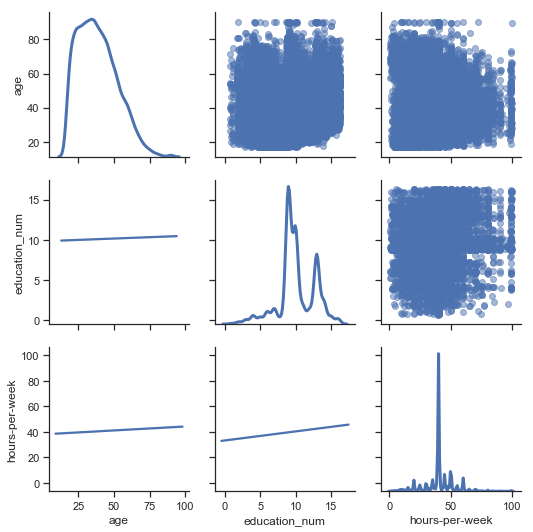

In [167]:
# Make a copy of the data to add jitter to and plot.
df_jittered=df_pick[['age','education_num','hours-per-week']]
# Making the random noise.
jitter = pd.DataFrame(
    np.random.uniform(-.3, .3, size=(df_jittered.shape)),
    columns=df_jittered.columns
)
# Combine the data and the noise.
df_jittered=df_jittered.add(jitter)

# Declare that you want to make a scatterplot matrix.
g = sns.PairGrid(df_jittered.dropna(), diag_sharey=False)
# Scatterplot.
g.map_upper(plt.scatter, alpha=.5)
# Fit line summarizing the linear relationship of the two variables.
g.map_lower(sns.regplot, scatter_kws=dict(alpha=0))
# Give information about the univariate distributions of the variables.
g.map_diag(sns.kdeplot, lw=3)
plt.show()

                     age  education_num  hours-per-week
age             1.000000       0.036527        0.068756
education_num   0.036527       1.000000        0.148123
hours-per-week  0.068756       0.148123        1.000000


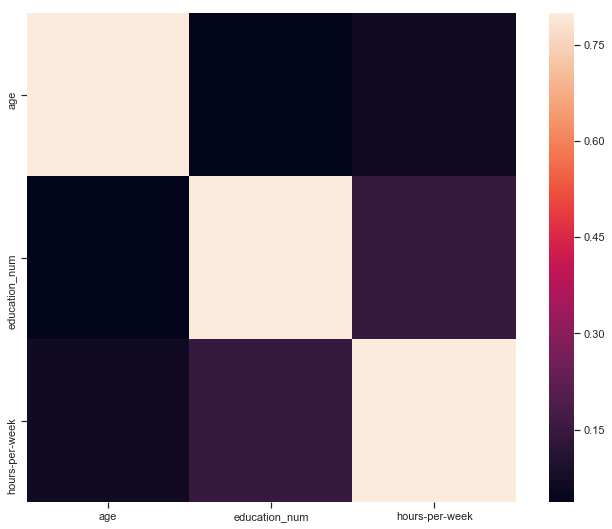

In [168]:
# Make the correlation matrix
corrmat = df_pick.corr()
print(corrmat)

# Set up the matplotlib figure.
f, ax = plt.subplots(figsize=(12, 9))

# Draw the heatmap using seaborn.
sns.heatmap(corrmat, vmax=.8, square=True)
plt.show()
# Heatmaps are a great way to get a quick visual read on a big correlation matrix.

# Try to match the correlation numbers to the scatterplots above to get a 
# sense of what each magnitude of correlation can look like.


In [169]:
df_pick.head()

,income,sex,race,age,education_num,hours-per-week
0,<=50K,Male,White,39,13,40
1,<=50K,Male,White,50,13,13
2,<=50K,Male,White,38,9,40
3,<=50K,Male,Black,53,7,40
4,<=50K,Female,Black,28,13,40


### For a continuous and a categorical pair: 1. Sex

/Users/yunjin/anaconda3/lib/python3.6/site-packages/seaborn/axisgrid.py:230: UserWarning: The `size` paramter has been renamed to `height`; please update your code.
  warnings.warn(msg, UserWarning)
/Users/yunjin/anaconda3/lib/python3.6/site-packages/seaborn/axisgrid.py:715: UserWarning: Using the boxplot function without specifying `order` is likely to produce an incorrect plot.
  warnings.warn(warning)


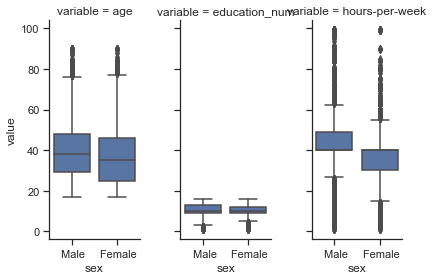

           value                                                   
           count       mean        std  min   25%   50%   75%   max
sex                                                                
 Female  32313.0  27.768112  16.465152  1.0  11.0  27.0  40.0  99.0
 Male    65370.0  30.654842  17.988969  1.0  12.0  34.0  42.0  99.0
age
Ttest_indResult(statistic=16.092517011911756, pvalue=4.8239930687799265e-58)
education_num
Ttest_indResult(statistic=2.215993925964509, pvalue=0.026698806191320954)
hours-per-week
Ttest_indResult(statistic=42.50952506734038, pvalue=0.0)


In [170]:
# Plot all the variables with boxplots for male and female.

# Restructure the data so we can use FacetGrid rather than making a boxplot
# for each variable separately.
df_long = df_pick[['sex','age','education_num','hours-per-week']]
df_long = pd.melt(df_long, id_vars=['sex'])

g = sns.FacetGrid(df_long, col="variable", size=4, aspect=.5)
g = g.map(sns.boxplot, "sex", "value")
plt.show()

# Descriptive statistics by group.
print(df_long.groupby('sex').describe())

# Remove space in values
df_pick['sex']=df_pick['sex'].str.strip()

# Test whether group differences are significant.
for col in df_pick.loc[:,'age':'hours-per-week'].columns:
    print(col)
    print(stats.ttest_ind(
        df_pick[df_pick['sex'] == 'Male'][col].dropna(),
        df_pick[df_pick['sex'] == 'Female'][col].dropna()
    ))

### 2. Race

/Users/yunjin/anaconda3/lib/python3.6/site-packages/seaborn/axisgrid.py:230: UserWarning: The `size` paramter has been renamed to `height`; please update your code.
  warnings.warn(msg, UserWarning)
/Users/yunjin/anaconda3/lib/python3.6/site-packages/seaborn/axisgrid.py:715: UserWarning: Using the boxplot function without specifying `order` is likely to produce an incorrect plot.
  warnings.warn(warning)


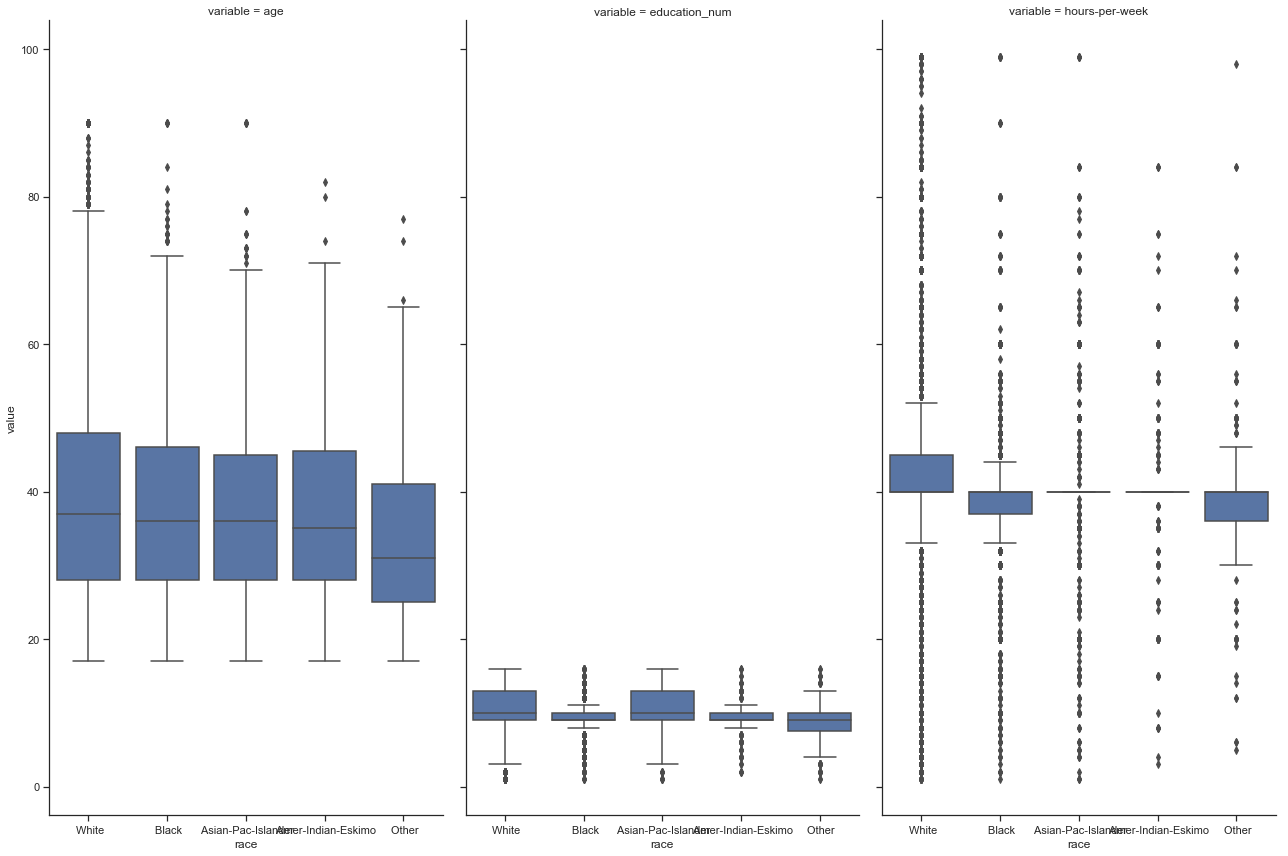

                       value                                               \
                       count       mean        std  min   25%   50%   75%   
race                                                                        
 Amer-Indian-Eskimo    933.0  28.844587  17.063139  2.0  10.0  31.0  40.0   
 Asian-Pac-Islander   3117.0  29.611485  16.878374  1.0  13.0  31.0  40.0   
 Black                9372.0  28.559006  16.536448  1.0  10.0  30.0  40.0   
 Other                 813.0  27.255843  16.273024  1.0  10.0  28.0  40.0   
 White               83448.0  29.864742  17.697929  1.0  12.0  31.0  40.0   

                           
                      max  
race                       
 Amer-Indian-Eskimo  84.0  
 Asian-Pac-Islander  99.0  
 Black               99.0  
 Other               98.0  
 White               99.0  
age
F_onewayResult(statistic=15.49303112476382, pvalue=1.1478278646296998e-12)
education_num
F_onewayResult(statistic=99.04787313118362, pvalue=6.0425647684041

In [171]:
# Plot all the variables with boxplots for male and female.

# Restructure the data so we can use FacetGrid rather than making a boxplot
# for each variable separately.
df_long = df_pick[['race','age','education_num','hours-per-week']]
df_long = pd.melt(df_long, id_vars=['race'])

g = sns.FacetGrid(df_long, col="variable", size=12, aspect=.5)
g = g.map(sns.boxplot, "race", "value")
plt.show()

# Descriptive statistics by group.
print(df_long.groupby('race').describe())

# Remove space in values
df_pick['race']=df_pick['race'].str.strip()

# Test whether group differences are significant.
for col in df_pick.loc[:,'age':'hours-per-week'].columns:
    print(col)
    print(stats.f_oneway(
        df_pick[df_pick['race'] == 'White'][col].dropna(),
        df_pick[df_pick['race'] == 'Black'][col].dropna(),
        df_pick[df_pick['race'] == 'Asian-Pac-Islander'][col].dropna(),
        df_pick[df_pick['race'] == 'Amer-Indian-Eskimo'][col].dropna(),
        df_pick[df_pick['race'] == 'Other'][col].dropna()       
    )) 

In [172]:
# df_pick[df_pick['race'] == 'others']['age']
df_pick['race'].unique()

array(['White', 'Black', 'Asian-Pac-Islander', 'Amer-Indian-Eskimo',
       'Other'], dtype=object)

### For two categorical variables: sex and race

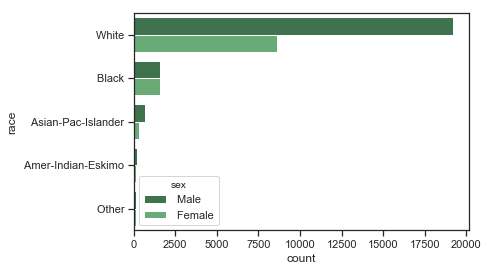

sex                   Female   Male
race                               
 Amer-Indian-Eskimo      119    192
 Asian-Pac-Islander      346    693
 Black                  1555   1569
 Other                   109    162
 White                  8642  19174
Power_divergenceResult(statistic=104994.76947882435, pvalue=0.0)


In [173]:
# Add a second categorical variable.
df_2cat = df[['sex','race']]

# Plot counts for each combination of levels.
sns.countplot(y="race", hue="sex", data=df_2cat, palette="Greens_d")
plt.show()

# Table of counts
counttable = pd.crosstab(df_2cat['race'], df_2cat['sex'])
print(counttable)

# Test will return a chi-square test statistic and a p-value. Like the t-test,
# the chi-square is compared against a distribution (the chi-square
# distribution) to determine whether the group size differences are large
# enough to reflect differences in the population.
print(stats.chisquare(counttable, axis=None))

## Feature Engineering
### Feature 1 : age

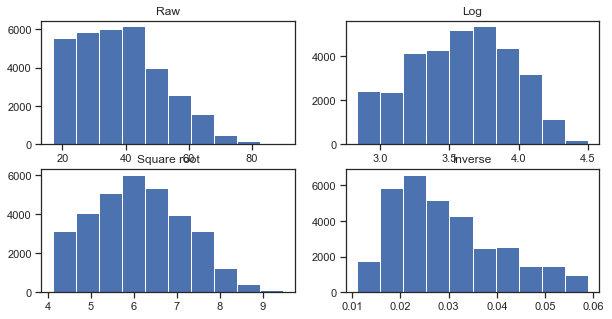

In [174]:
# Making a four-panel plot.
fig = plt.figure(figsize=[10,5])

fig.add_subplot(221)
plt.hist(df['age'].dropna())
plt.title('Raw')

fig.add_subplot(222)
plt.hist(np.log(df['age'].dropna()))
plt.title('Log')

fig.add_subplot(223)
plt.hist(np.sqrt(df['age'].dropna()))
plt.title('Square root')

ax3=fig.add_subplot(224)
plt.hist(1/df['age'].dropna())
plt.title('Inverse')
plt.show()

# None of these transformations look particularly great, actually. But let's
# make a feature from the log one.
features = pd.DataFrame()
features['log_age'] = np.log(df['age'])

### Feature 2: education

<Figure size 1440x216 with 0 Axes>

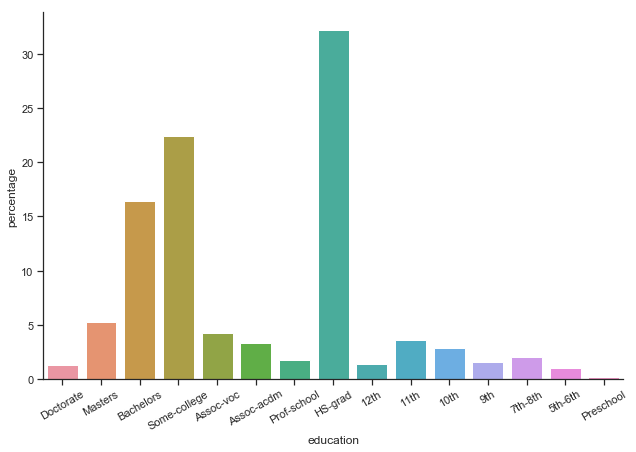

In [175]:
# Remove space in values
df['education']=df['education'].str.strip()

fig = plt.figure(figsize=[20,3])
edu_pct=df['education'].value_counts()/len(df['education'])*100
edu_pct=pd.DataFrame({'education':edu_pct.index,'pct':edu_pct})
edu_pct=edu_pct.reindex(index=['Doctorate','Masters','Bachelors','Some-college','Assoc-voc','Assoc-acdm','Prof-school','HS-grad','12th','11th','10th','9th','7th-8th','5th-6th','1th-4th','Preschool'])
edu_pct
sns.set(style='ticks')
g=sns.catplot(x='education',y='pct',kind="bar",height=6, aspect=1.5, data=edu_pct)
g.set_ylabels('percentage')
g.set_xticklabels(rotation=30)

# I re-categorized education variable into 1.above Bachelors 2. prof-school ~ some college 3. high school grad 4. preschool ~ 12th  
mapper={'Doctorate':1,'Masters':1,'Bachelors':1,'Some-college':2,'Assoc-voc':2,'Assoc-acdm':2,'Prof-school':2,'HS-grad':3,'12th':4,'11th':4,'10th':4,'9th':4,'7th-8th':4,'5th-6th':4,'1th-4th':4,'Preschool':4}
features['education_recat']=df['education'].replace(mapper)

###  Feature 3: Hours per week

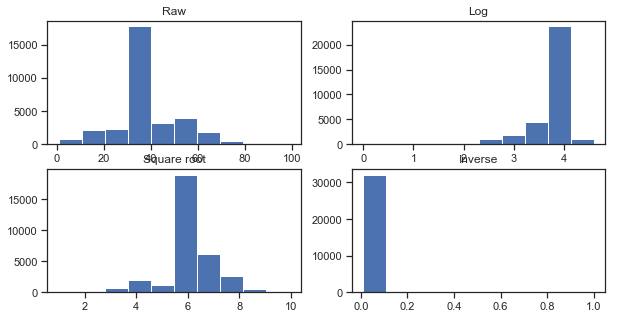

In [176]:
# Making a four-panel plot.
fig = plt.figure(figsize=[10,5])

fig.add_subplot(221)
plt.hist(df['hours-per-week'].dropna())
plt.title('Raw')

fig.add_subplot(222)
plt.hist(np.log(df['hours-per-week'].dropna()))
plt.title('Log')

fig.add_subplot(223)
plt.hist(np.sqrt(df['hours-per-week'].dropna()))
plt.title('Square root')

ax3=fig.add_subplot(224)
plt.hist(1/df['hours-per-week'].dropna())
plt.title('Inverse')
plt.show()

#Although hours per week variable doesn't follow normal distribution, I decided to include in this as it is because 
#it reflects category-like traits. (Most people are gathered around 40 hrs per week.)

features['hoursperweek']=df['hours-per-week']

### Feature 4 : race

In [177]:
print(df['race'].value_counts()/len(df['race'])*100)
print(df['race'].value_counts())
features['race']=df['race']

 White                 85.427352
 Black                  9.594300
 Asian-Pac-Islander     3.190934
 Amer-Indian-Eskimo     0.955130
 Other                  0.832284
Name: race, dtype: float64
 White                 27816
 Black                  3124
 Asian-Pac-Islander     1039
 Amer-Indian-Eskimo      311
 Other                   271
Name: race, dtype: int64


### Feature 5 : work class

<Figure size 1440x216 with 0 Axes>

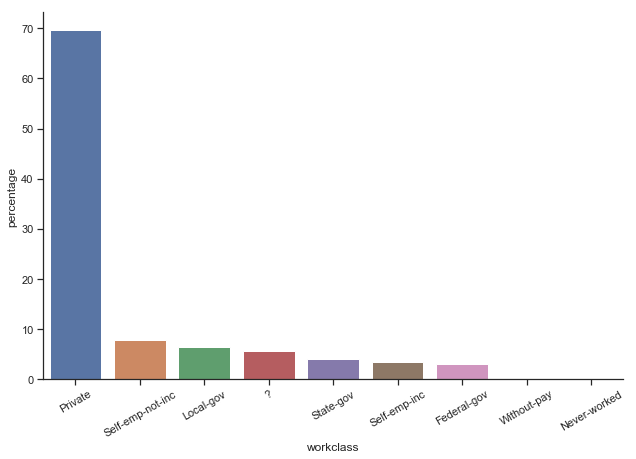

In [178]:
df['workclass']=df['workclass'].str.strip()

fig = plt.figure(figsize=[20,3])
work_pct=df['workclass'].value_counts()/len(df['workclass'])*100
work_pct=pd.DataFrame({'workclass':work_pct.index,'pct':work_pct})

sns.set(style='ticks')
g=sns.catplot(x='workclass',y='pct',kind="bar",height=6, aspect=1.5, data=work_pct)
g.set_ylabels('percentage')
g.set_xticklabels(rotation=30)

# workclass is categorized into 4 classes - Gorvernment; Self employed; Private; others
mapping={'State-gov':'gov','Self-emp-not-inc':'self-emp', 'Private':'private', 'Federal-gov':'gov',
       'Local-gov':'gov', '?':'others', 'Self-emp-inc':'self-emp', 'Without-pay':'others', 'Never-worked':'others'}
features['workclass_private']=df['workclass'].map(mapping)


### Feature 6 : Sex

Got dummies from sex variable

In [179]:
# features = pd.get_dummies(df['sex'])

### Feature 7 : sex * age interaction

In [180]:
#import sex and income value and categorizing

features['sex']=np.where(df['sex']==' Male',1,2)
features['income']=np.where(df['income']==' >50K',1,0)

In [181]:
#binning age variable
# bins = [16, 30, 40, 50, 65, np.inf]
# names = [1,2,3,4,5]

# features['age_cat'] = pd.cut(df['age'], bins, labels=names)


In [182]:
from patsy import dmatrices

# create dummy variables, and their interactions
y, X1 = dmatrices('C(income) ~ log_age*C(sex)', features, return_type="dataframe")


In [183]:
from sklearn.linear_model import LogisticRegression
from sklearn.feature_selection import chi2

#Run logistic regression because we have categorical dependent variable(income)
y=features['income']
model=LogisticRegression()
model.fit(X1,y)

LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
          intercept_scaling=1, max_iter=100, multi_class='ovr', n_jobs=1,
          penalty='l2', random_state=None, solver='liblinear', tol=0.0001,
          verbose=0, warm_start=False)

In [184]:
# check out p-values for each betas
scores, p = chi2(X1, y)
print(X1.columns)
print([round(float(i), 2) for i in p])

Index(['Intercept', 'C(sex)[T.2]', 'log_age', 'log_age:C(sex)[T.2]'], dtype='object')
[1.0, 0.0, 0.0, 0.0]


The p-values show that the interaction between age and sex is significant, so we include interaction term as features

In [185]:
features['inter_agesex']=X1['log_age:C(sex)[T.2]']

### Feature 8 : native-country
United-States, England, Canada, Germany, Japan, Greece, Italy, Portugal,Ireland, France, Holand-Netherlands

Cambodia,  Puerto-Rico,   Outlying-US(Guam-USVI-etc), India,  South, China, Cuba, Iran, Honduras, Philippines,  Poland, Jamaica, Vietnam, Mexico,   Dominican-Republic, Laos, Ecuador, Taiwan, Haiti, Columbia, Hungary, Guatemala, Nicaragua, Scotland, Thailand, Yugoslavia, El-Salvador, Trinadad&Tobago, Peru, Hong.

Asia_East <- c(" Cambodia", " China", " Hong", " Laos", " Thailand",
               " Japan", " Taiwan", " Vietnam")

Asia_Central <- c(" India", " Iran")

Central_America <- c(" Cuba", " Guatemala", " Jamaica", " Nicaragua", 
                     " Puerto-Rico",  " Dominican-Republic", " El-Salvador", 
                     " Haiti", " Honduras", " Mexico", " Trinadad&Tobago")

South_America <- c(" Ecuador", " Peru", " Columbia")


Europe_West <- c(" England", " Germany", " Holand-Netherlands", " Ireland", 
                 " France", " Greece", " Italy", " Portugal", " Scotland")

Europe_East <- c(" Poland", " Yugoslavia", " Hungary")

In [186]:
# mapping={" Cambodia":'Asia_East', " China":'Asia_East', " Hong":'Asia_East', 
#          " Laos":'Asia_East', " Thailand":'Asia_East'," Japan":'Asia_East', 
#          " Taiwan":'Asia_East', " Vietnam":'Asia_East'
#         ," India":'Asia_Central', " Iran":'Asia_Central'
#         ," Cuba":'Central_America', " Guatemala":'Central_America', " Jamaica":'Central_America',
#          " Nicaragua":'Central_America', " Puerto-Rico":'Central_America',  " Dominican-Republic":'Central_America',
#          " El-Salvador":'Central_America', " Haiti":'Central_America', " Honduras":'Central_America',
#          " Mexico":'Central_America', " Trinadad&Tobago":'Central_America'
#         ," Ecuador":'South_America', " Peru":'South_America', " Columbia":'South_America'
#         ," England":'Europe_West', " Germany":'Europe_West', " Holand-Netherlands":'Europe_West',
#          " Ireland":'Europe_West', " France":'Europe_West', " Greece":'Europe_West', " Italy":'Europe_West', 
#          " Portugal":'Europe_West', " Scotland":'Europe_West'
#         ," Poland":'Europe_East', " Yugoslavia":'Europe_East', " Hungary":'Europe_East'
#         ,' United-States':'United-States'}
df['native-country']=df['native-country'].str.strip()
mapping={'United-States':'developed', 'England':'developed', 'Canada':'developed', 'Germany':'developed', 
         'Japan':'developed', 'Greece':'developed', 'Italy':'developed', 'Portugal':'developed',
         'Ireland':'developed', 'France':'developed', 'Holand-Netherlands':'developed'
        ,'Cambodia':'developing', 'Puerto-Rico':'developing', 'Outlying-US(Guam-USVI-etc)':'developing', 
         'India':'developing', 'China':'developing', 'Cuba':'developing', 'Iran':'developing', 
         'Honduras':'developing', 'Philippines':'developing', 'Poland':'developing', 
         'Jamaica':'developing', 'Vietnam':'developing', 'Mexico':'developing', 
         'Dominican-Republic':'developing', 'Laos':'developing', 'Ecuador':'developing', 
         'Taiwan':'developing', 'Haiti':'developing', 'Columbia':'developing', 
         'Hungary':'developing', 'Guatemala':'developing', 'Nicaragua':'developing', 
         'Scotland':'developing', 'Thailand':'developing', 'Yugoslavia':'developing', 
         'El-Salvador':'developing', 'Trinadad&Tobago':'developing', 'Peru':'developing', 
         'Hong':'developing'
        , 'South':'unknown','?':'unknown'}
features['country']=df['native-country'].map(mapping)

### Feature 9: relationship
Nominal attribute denoting the relationship status of a person with values - Wife, Own-child, Husband, Not-in-family, Other-relative, Unmarried.

In [187]:
df['relationship'].value_counts()

features['relationship']=df['relationship']

### Feature 10: hours-per-week * native-country interaction

In [188]:
features.head()

,log_age,education_recat,hoursperweek,race,workclass_private,sex,income,inter_agesex,country,relationship
0,3.663562,1,40,White,gov,1,0,0.000000,developed,Not-in-family
1,3.912023,1,13,White,self-emp,1,0,0.000000,developed,Husband
2,3.637586,3,40,White,private,1,0,0.000000,developed,Not-in-family
3,3.970292,4,40,Black,private,1,0,0.000000,developed,Husband
4,3.332205,1,40,Black,private,2,0,3.332205,developing,Wife


In [189]:
# create dummy variables, and their interactions
y, X1 = dmatrices('C(income) ~ (hoursperweek)*C(country)', features, return_type="dataframe")

In [190]:
#Run logistic regression because we have categorical dependent variable(income)
y=features['income']
model=LogisticRegression()
model.fit(X1,y)

LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
          intercept_scaling=1, max_iter=100, multi_class='ovr', n_jobs=1,
          penalty='l2', random_state=None, solver='liblinear', tol=0.0001,
          verbose=0, warm_start=False)

In [191]:
# check out p-values for each betas
scores, p = chi2(X1, y)
print(X1.columns)
print([round(float(i), 2) for i in p])

Index(['Intercept', 'C(country)[T.developing]', 'C(country)[T.unknown]',
       'hoursperweek', 'hoursperweek:C(country)[T.developing]',
       'hoursperweek:C(country)[T.unknown]'],
      dtype='object')
[1.0, 0.0, 0.83, 0.0, 0.0, 0.0]


In [192]:
features['inter_hourctry1']=X1['hoursperweek:C(country)[T.developing]']
features['inter_hourctry2']=X1['hoursperweek:C(country)[T.unknown]']

In [194]:
features.head()

,log_age,education_recat,hoursperweek,race,workclass_private,sex,income,inter_agesex,country,relationship,inter_hourctry1,inter_hourctry2
0,3.663562,1,40,White,gov,1,0,0.000000,developed,Not-in-family,0.0,0.0
1,3.912023,1,13,White,self-emp,1,0,0.000000,developed,Husband,0.0,0.0
2,3.637586,3,40,White,private,1,0,0.000000,developed,Not-in-family,0.0,0.0
3,3.970292,4,40,Black,private,1,0,0.000000,developed,Husband,0.0,0.0
4,3.332205,1,40,Black,private,2,0,3.332205,developing,Wife,40.0,0.0
